# 9.2 Course Project: Milestone 4--Finalizing Your Results 

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("walmart.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
# Step 1: Data Preparation

# Convert and Extract Date Features

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [5]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['Holiday_Flag'], drop_first=True)

In [6]:
# Create Lag Features
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df.dropna(inplace=True)

In [7]:
# Train-Test Split
train = df[df['Year'] < 2012]
test = df[df['Year'] == 2012]

features = ['Store', 'Holiday_Flag_1', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Lag_1']
X_train = train[features]
y_train = train['Weekly_Sales']
X_test = test[features]
y_test = test['Weekly_Sales']

In [8]:
# Step 2. Build and Evaluate a Model

# Random Forest Regressor as a baseline model as it is robust for tabular data

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 76546.41717896645
RMSE: 110366.18178468249


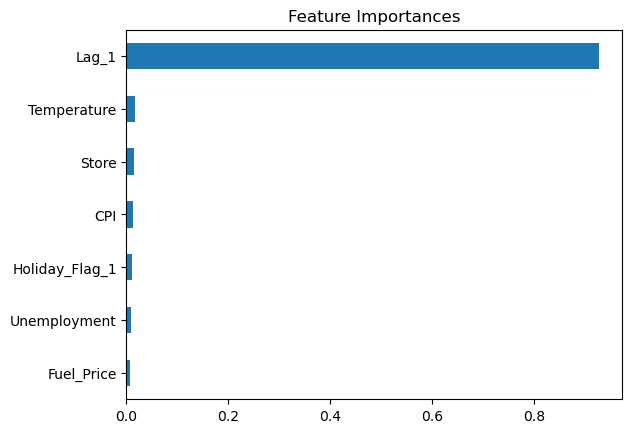

In [9]:
# Step 3. Interpret results

feat_import = pd.Series(model.feature_importances_, index=features)
feat_import.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()

Feature importance plot reveals that Lag_1 or previous Week’s sales is by far the most influential predictor.
Other features (like CPI, Temperature, and Holiday Flag) has minimal impact on model performance in their current form.

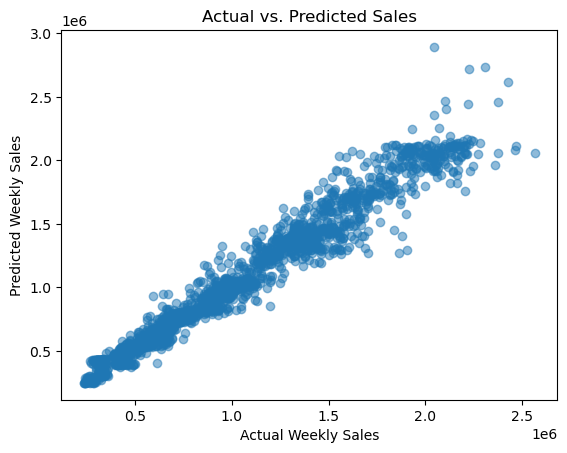

In [11]:
plt.scatter(y_test, preds, alpha=0.5)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

The Actual vs. Predicted Plot shows a strong correlation between predicted and actual values, validating the model’s capability to learn from historical data. However, some variance at higher sales values suggests further tuning could improve predictions during peak weeks.